In [1]:
import pandas as pd 
df=pd.read_excel('meeshonew.xlsx')
df

,order_date,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-23,rto,Chandigarh,144402,116.96,2456,0,2456
1,2022-08-31,Shipped,Karnataka,560005,100.30,2106,0,2106
2,2022-08-22,Delivered,Punjab,160055,100.30,2106,0,2079
3,2022-08-22,Delivered,Punjab,143101,99.86,2097,0,2101
4,2022-08-15,rto,Delhi,452001,99.86,2097,0,2097
...,...,...,...,...,...,...,...,...
133,2022-08-25,Delivered,Himachal Pradesh,171207,23.76,499,0,499
134,2022-08-28,Delivered,Rajasthan,314001,23.76,499,0,480
135,2022-08-25,Delivered,Rajasthan,324002,23.48,493,0,493
136,2022-08-25,rto,Telangana,506001,23.48,493,0,493


In [5]:
print(df.head())


  order_date order_status       state     pin  gst_amount  meesho_price  \
0 2022-08-23          rto  Chandigarh  144402      116.96          2456   
1 2022-08-31      Shipped   Karnataka  560005      100.30          2106   
2 2022-08-22    Delivered      Punjab  160055      100.30          2106   
3 2022-08-22    Delivered      Punjab  143101       99.86          2097   
4 2022-08-15          rto       Delhi  452001       99.86          2097   

   shipping_charges_total  price  
0                       0   2456  
1                       0   2106  
2                       0   2079  
3                       0   2101  
4                       0   2097  


In [6]:
print(df.isnull().sum())


order_date                0
order_status              0
state                     0
pin                       0
gst_amount                0
meesho_price              0
shipping_charges_total    0
price                     0
dtype: int64


In [9]:
df = df.dropna()
print(df.duplicated().sum())

3


In [7]:
print(df.describe())

                          order_date            pin  gst_amount  meesho_price  \
count                            138     138.000000  138.000000    138.000000   
mean   2022-08-16 23:07:49.565217280  477676.594203   62.015507   1292.289855   
min              2022-07-29 00:00:00  110007.000000   23.480000    493.000000   
25%              2022-08-09 00:00:00  316501.250000   62.440000   1302.750000   
50%              2022-08-18 12:00:00  497845.500000   64.300000   1350.000000   
75%              2022-08-25 00:00:00  670991.750000   71.405000   1491.500000   
max              2022-08-31 00:00:00  848504.000000  116.960000   2456.000000   
std                              NaN  207795.595378   20.974350    440.464241   

       shipping_charges_total        price  
count              138.000000   138.000000  
mean                69.673913  1358.572464  
min                  0.000000   480.000000  
25%                  0.000000  1414.000000  
50%                108.000000  1464.000000  


In [8]:
print(df['order_status'].value_counts())

order_status
Delivered    50
Return       34
Shipped      26
rto          22
Cancelled     4
Exchange      2
Name: count, dtype: int64


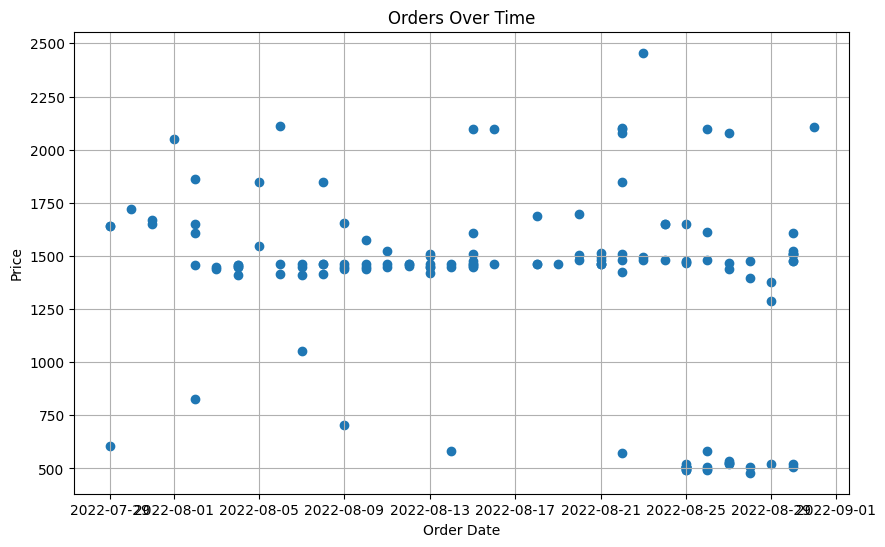

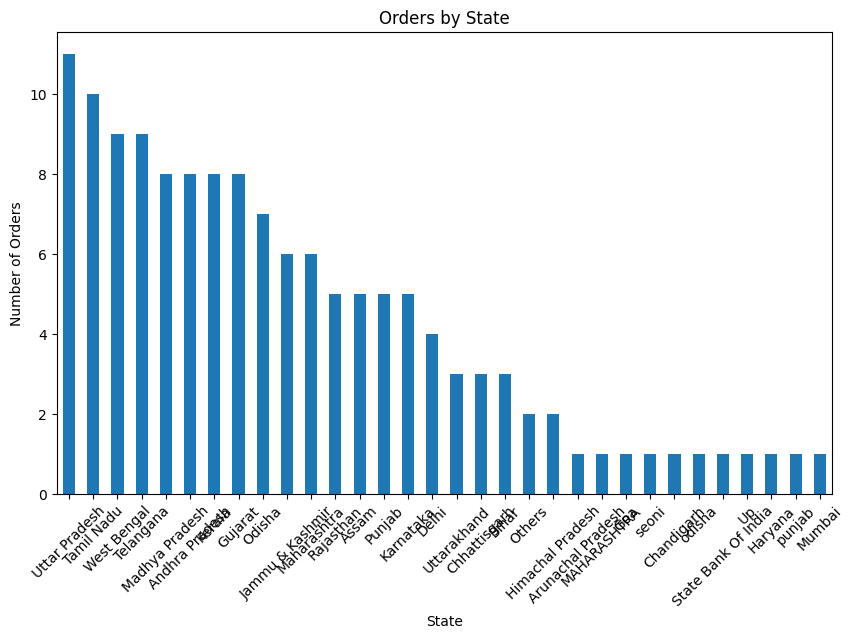

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['order_date'] = pd.to_datetime(df['order_date'])
plt.scatter(df['order_date'], df['price'], marker='o')
plt.title('Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
state_counts = df['state'].value_counts()
state_counts.plot(kind='bar')
plt.title('Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


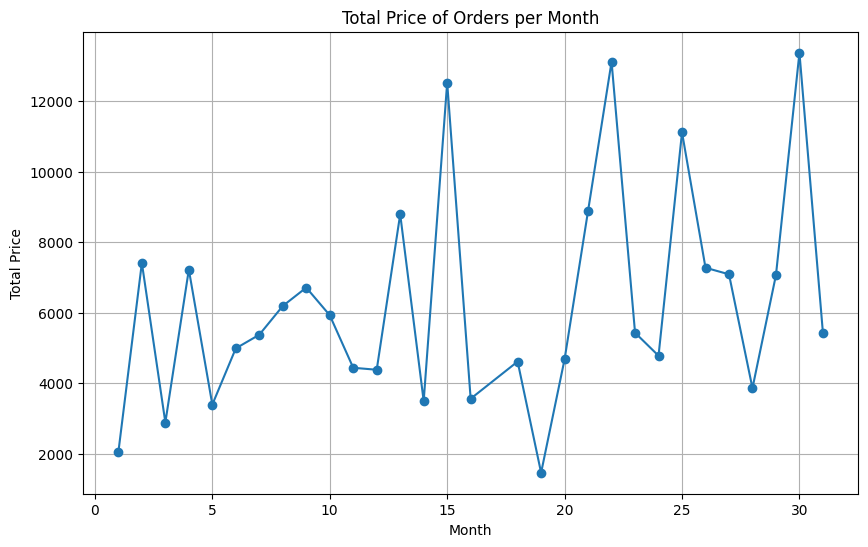

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'order_date' is already converted to datetime
df['order_year'] = df['order_date'].dt.day

# Group by year and sum the prices
monthly_prices = df.groupby('order_year')['price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_prices.index, monthly_prices.values, marker='o', linestyle='-')
plt.title('Total Price of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()


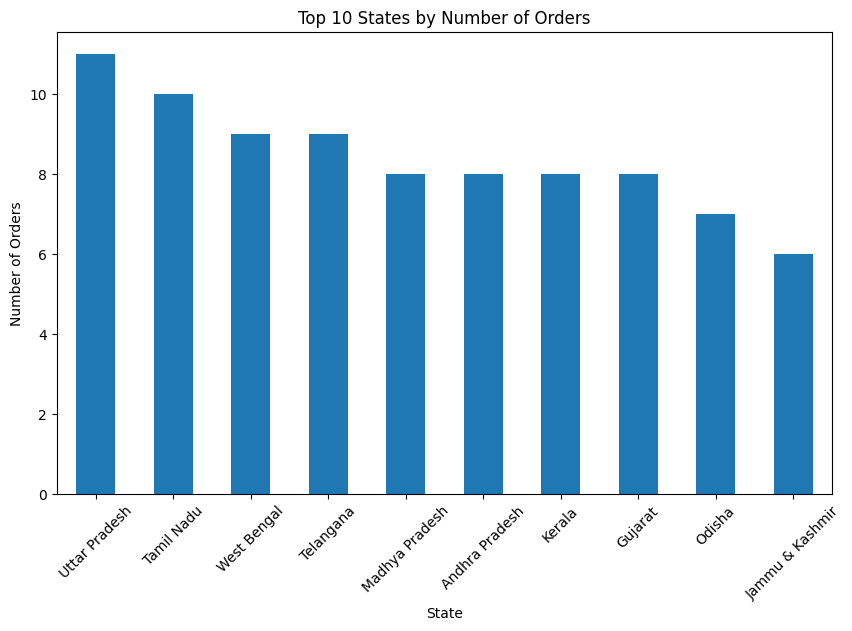

In [16]:
plt.figure(figsize=(10, 6))
top_10_states = state_counts.head(10)  # Selecting only the top 10 states
top_10_states.plot(kind='bar')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


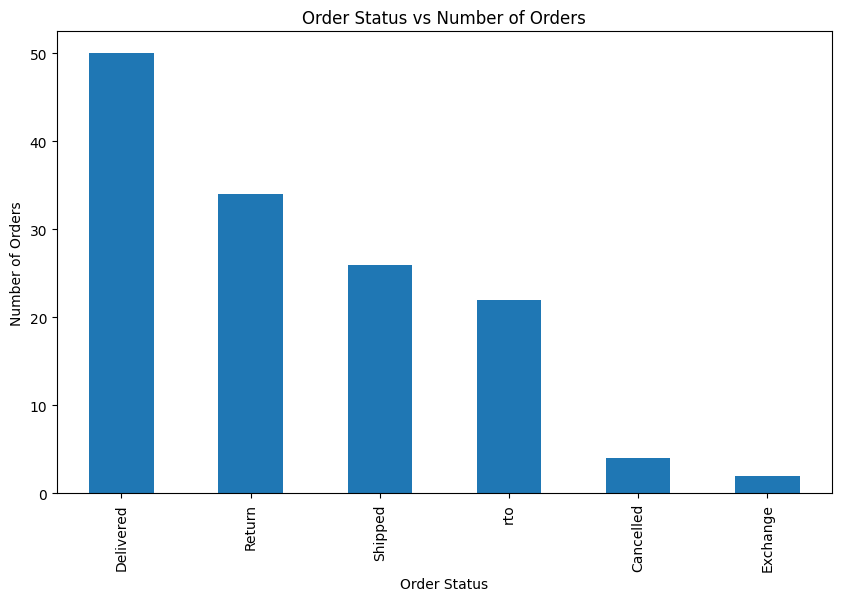

In [7]:
plt.figure(figsize=(10, 6))
order_status_counts = df['order_status'].value_counts()
order_status_counts.plot(kind='bar')
plt.title('Order Status vs Number of Orders')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
#plt.xticks(rotation=45)
plt.show()


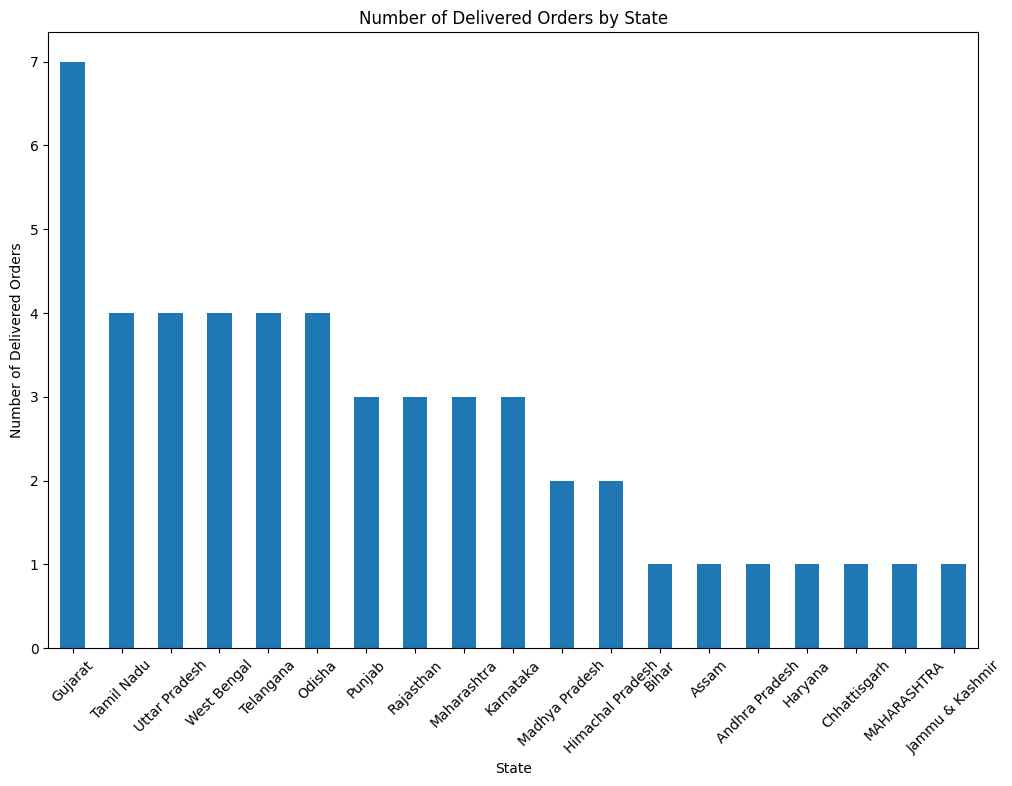

In [9]:
# Filter DataFrame to include only delivered orders
delivered_orders = df[df['order_status'] == 'Delivered']

# Count the number of delivered orders per state
delivered_orders_by_state = delivered_orders['state'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
delivered_orders_by_state.plot(kind='bar')
plt.title('Number of Delivered Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Delivered Orders')
plt.xticks(rotation=45)
plt.show()


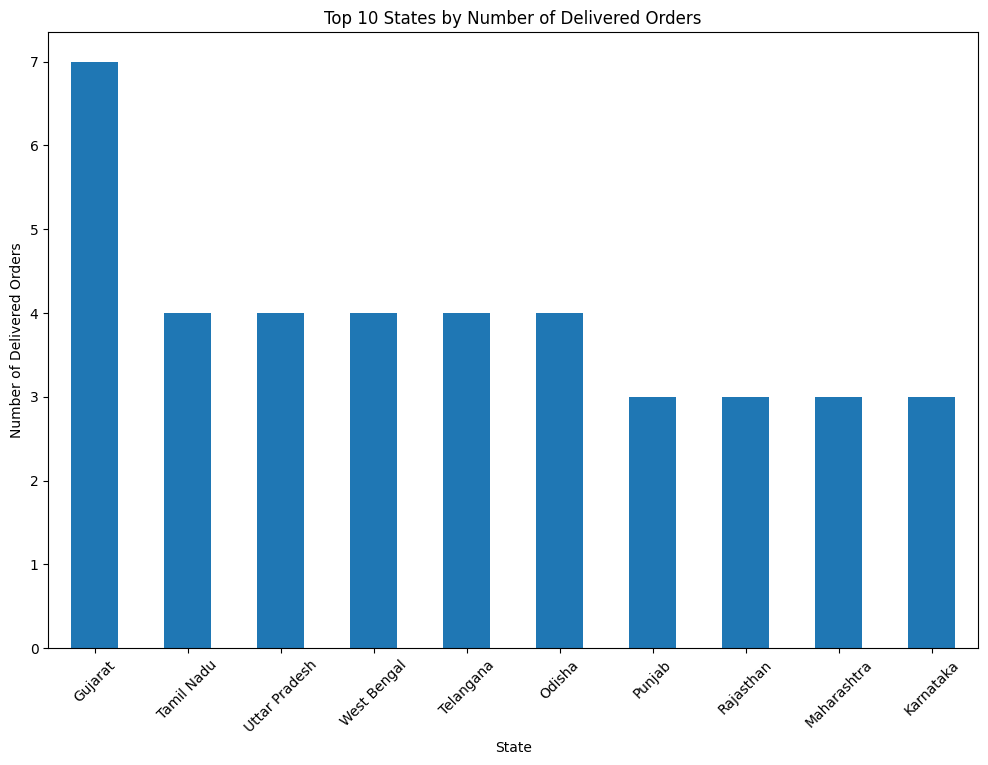

In [10]:
# Count the number of delivered orders per state
delivered_orders_by_state = delivered_orders['state'].value_counts()

# Select only the top 10 states
top_10_states = delivered_orders_by_state.head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_10_states.plot(kind='bar')
plt.title('Top 10 States by Number of Delivered Orders')
plt.xlabel('State')
plt.ylabel('Number of Delivered Orders')
plt.xticks(rotation=45)
plt.show()
